#Time series problems deal with anything which has a time component.

Think of:

Forecasting the stock price of Apple tomorrow given historical data

Predicting how much electricity a city will need next month based on the last 5-years of electricity demand

Analyzing ECG (heart monitor) data to detect whether or not a heartbeat is irregular or not

####One type problem would be a classification problem:
Anomly detection  (what and which type question for classification )
for example : ECG signals when the signals goes out of the usual signal then that is an anomly.

The output is alway discreret type

#### second type of problem whould be forcasting:
how many we need for next month or next year ( how much)
for eg : price prediction:

the output is contionus

* The biggest thing is all this problems has a temporal or time component


https://www.uber.com/en-DE/blog/forecasting-introduction/ ( uber companies forcasting models)

*Notes* :*The longer you look into the future for forcasting the larger the error it can be.*
## what can we predict and what we cant (https://otexts.com/fpp3/)

The predictability of an event or a quantity depends on several factors including:

how well we understand the factors that contribute to it;
how much data is available;
how similar the future is to the past;
whether the forecasts can affect the thing we are trying to forecast.



#what are we going to cover
* mutiple time series model

* multivarate model to take mutivariate time series data

* Replicating the N-beat algorthims using tensor flow:
  N-BEATS is like a smart tool that helps predict future values in a time series (like stock prices or weather) based on past data. What makes it cool is that it not only makes accurate predictions but also explains why it thinks something will happen. It breaks down the time series into understandable parts, making it easier for people to see and trust the predictions. So, it's a blend of accuracy and clarity in forecasting future trends.
* Making prediction intervals



# Time series in output and input problems:

output would be alway s continous as its a forcast problem.

### Our project is forcasting bitcoins so for this we have to something with the input and output

input(window) :  for one week
output(horizon) : would be the price at the next day (predict the next day)


its a sequance to sequance model as we are inputing in a week data to predict the next day ,so we can call it as many to one.





#About the projects
we are going to predcit the price of bitcoin
the data we can get from CoinDesk website https://www.coindesk.com/price/bitcoin/

In [ ]:
# import data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-25 08:28:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2024-01-25 08:28:33 (69.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
data = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=['Date'],index_col=['Date']) # to read in in csv
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
data.shape

(2787, 5)

if you observe above there only 2000 models or samples , and we quite think that for a deep learning modle we need to have larger data.
but in case of time series data we often run it small data

*note*: seasonality means the number of sample per year , in our data we have seasonalty 365 as we collect one data for one day in an year.


# Types of time series data
>- Trend: decresing or incresing trends <br/>
>- seasonal : incraed sales toward to wards a particular month<br/>
>-cyclic :rise and fall of pattern at uncertain time frames<br/>
>- univariate and mutivarait data: one varaible to predict the target varaible taht is univariat where as multivarait is more than one varaible for predicting the target varaible


In [ ]:
bitdata = pd.DataFrame(data ['Closing Price (USD)']).rename(columns ={"Closing Price (USD)": "Price"})
bitdata

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, 'BTC price variation from 2013 to 2021')

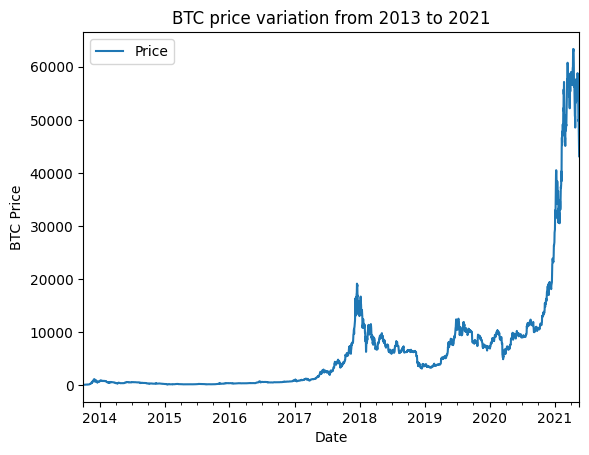

In [ ]:
import matplotlib.pyplot as plt

bitdata.plot()
plt.ylabel('BTC Price')
plt.title('BTC price variation from 2013 to 2021')

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

# Creat a train sets and test sets of data

>- now the real challenge is in time series problem giving 20 % of actaull data to test and rest to train might not work because the data is depended on time, so we need to give it in folds.
In time series data, the normal way of splitting data into training and testing sets, such as using train_test_split from scikit-learn, may not be appropriate. The reason is that time series data has a temporal ordering, and randomly shuffling the data or splitting it randomly can lead to data leakage and unrealistic evaluations of your model's performance.
(https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8)

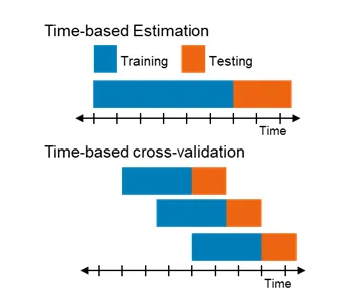

In [ ]:
# Get bitcoin date array
timesteps = bitdata.index.to_numpy()
prices = bitdata["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

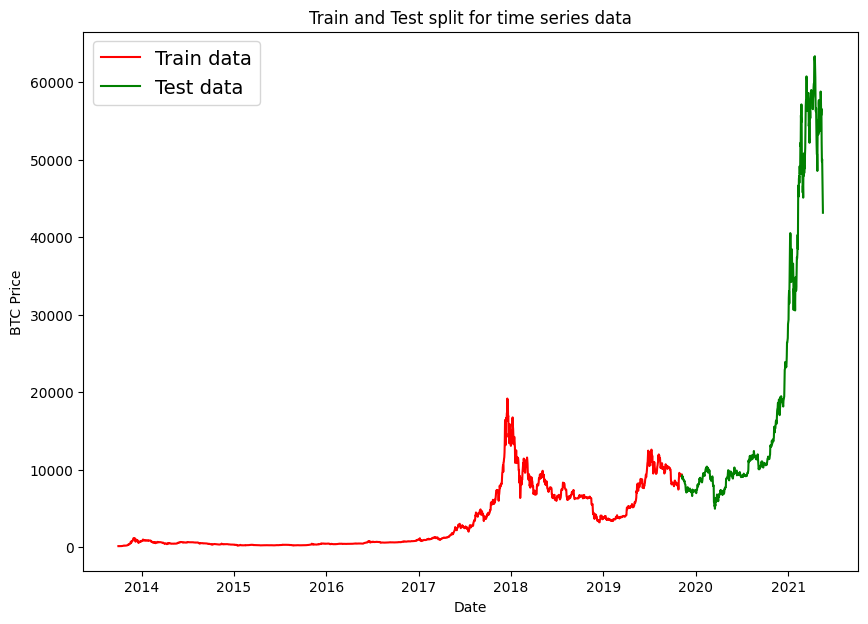

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.plot(X_train, y_train, label="Train data", color='red')
plt.plot(X_test, y_test, label="Test data", color='green')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title('Train and Test split for time series data')
plt.legend(fontsize=14)
plt.show()

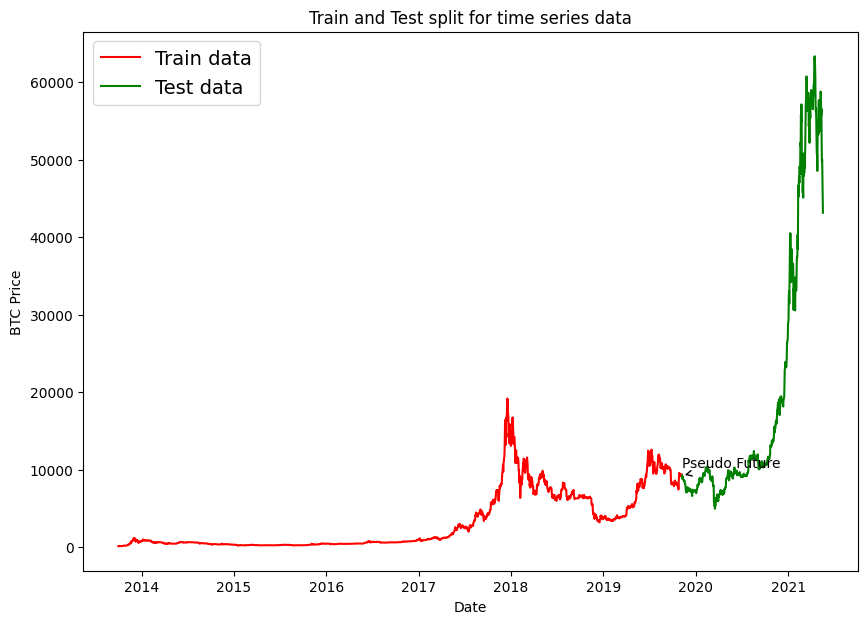

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are your training and testing data
# Replace these with your actual data.

# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.plot(X_train, y_train, label="Train data", color='red')
plt.plot(X_test, y_test, label="Test data", color='green')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title('Train and Test split for time series data')
plt.legend(fontsize=14)

# Annotate the 'pseudo future' part
arrow_properties = dict(facecolor='black', arrowstyle='->')
plt.annotate('Pseudo Future', xy=(X_test[0], y_test[0]), xytext=(X_test[0], y_test[0] + 1000), arrowprops=arrow_properties)

plt.show()


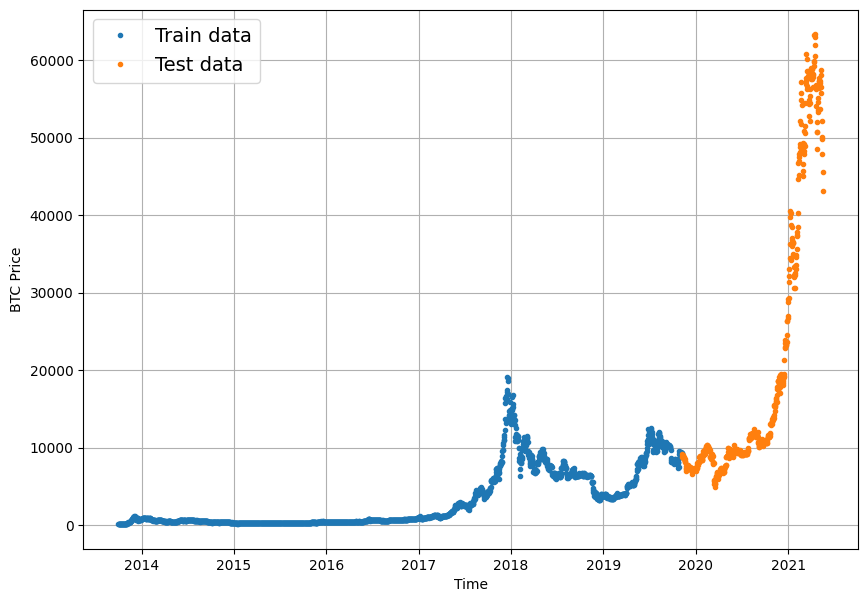

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots a time series.

    Parameters
    ----------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)  # make label bigger
    plt.grid(True)

# Example usage
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plt.show()


#Modellin Experiments
The different models that we are going to run to forecast the bitcoin prices.
>- Naive Model
>- Dense Model
>-Conv 1d
>- LSTM
>-N-beats Aldorthims
>- Ensembels
>- Future prediction models<br/>
Horizon: Think of the horizon as the future you're looking at. If you're trying to predict the weather for the next seven days, your horizon is seven days. It's like gazing into the future to see how things will unfold.

Window: Now, imagine you have a window that you can slide over your historical data. This window helps you see what's been happening in the past. For instance, if you want to predict tomorrow's weather, you might look at the weather patterns in the past month or year. The window is like a tool that helps you focus on a specific period in the past to make your predictions for the future.



#Baseline (Naive Model)

In layman's terms, a naive model is like making predictions based on the most straightforward and simple approach, without considering any complexities or patterns in the data.

Imagine you're trying to predict tomorrow's weather using a naive model. You might just say that tomorrow's weather will be the same as today's. It's a basic assumption that doesn't take into account any seasonal changes, historical trends, or specific patterns. You're keeping it simple by assuming things will stay the same
$$\hat{y}_{t} = y_ {t-1}$$

In [ ]:
#Blindly predicting pervious timestep as the next timestep:
#The prediction at timestep t is equal ti the value at timestpe t-1 (previous timestep and this is for horizon one )
#NAive forecast
naive_forecast = y_test[:-1] # (t-1)
naive_forecast[-1]


45604.6157536131

In [ ]:
y_test[-1]

43144.4712908603

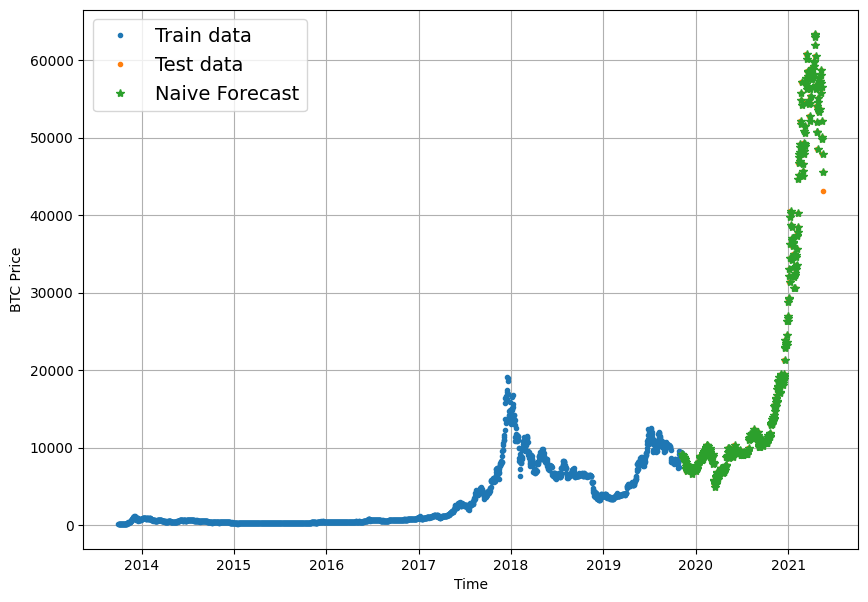

In [ ]:
plt.figure(figsize =(10,7))
plot_time_series(timesteps = X_train,values =y_train ,label = "Train data")
plot_time_series(timesteps = X_test,values =y_test,label = "Test data")
plot_time_series(timesteps =X_test[1:], values = naive_forecast,format = "*", label ="Naive Forecast")


Text(0.5, 1.0, 'Naive forecast ')

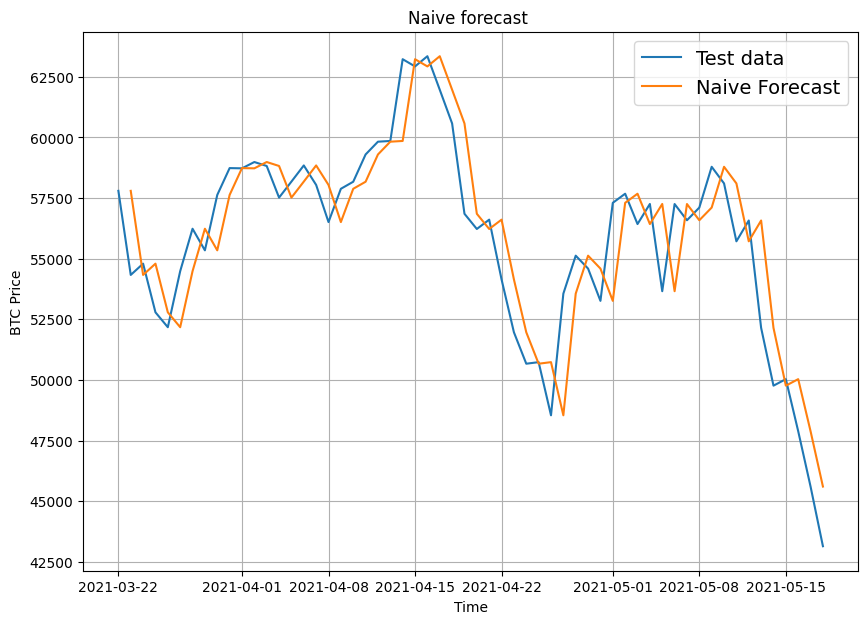

In [ ]:
plt.figure(figsize =(10,7))
#plot_time_series(timesteps = X_train,values =y_train ,label = "Train data")
plot_time_series(timesteps = X_test,values =y_test, start = 500,format = "-",label = "Test data")
plot_time_series(timesteps =X_test[1:], values = naive_forecast,start = 500,format = "-", label ="Naive Forecast")
plt.title("Naive forecast ")

Both naive forecasting and autoregression are methods used in time series analysis, but they differ in their approach to predicting future values.

**Naive Forecasting:**
- In naive forecasting, the future value is simply assumed to be the same as the most recent observed value.
- The prediction is based on the idea that the most recent observation is a good indicator of what will happen next.
- Mathematically, a naive forecast can be expressed as \( \hat{Y}_{t+1} = Y_t \), where \( \hat{Y}_{t+1} \) is the predicted value for the next time point, and \( Y_t \) is the most recent observed value.

**Autoregression (AR):**
- Autoregressive models, on the other hand, use a more systematic approach. The future value is predicted as a linear combination of past values.
- In an autoregressive model of order \(p\) (AR(p)), the relationship between the current value and past values is explicitly modeled using coefficients.
- Mathematically, an AR(p) model is expressed as \( Y_t = c + \phi_1 \cdot Y_{t-1} + \phi_2 \cdot Y_{t-2} + \ldots + \phi_p \cdot Y_{t-p} + \epsilon_t \), where \( c \) is a constant, \( \phi_1, \phi_2, \ldots, \phi_p \) are coefficients, \( Y_{t-1}, Y_{t-2}, \ldots, Y_{t-p} \) are past values, and \( \epsilon_t \) is an error term.

**Connection:**
- The connection lies in the simplicity of the forecasting approach. Naive forecasting can be viewed as a special case of autoregression where \(p = 1\) (AR(1)).
- In other words, the naive forecast \( \hat{Y}_{t+1} = Y_t \) is equivalent to an autoregressive model of order 1: \( Y_t = c + \phi \cdot Y_{t-1} + \epsilon_t \) with \( \phi = 1 \).

While both methods may seem similar in their simplicity, autoregression allows for more flexibility by introducing coefficients that can be estimated from the data. Autoregressive models are part of a broader class of time series models that capture temporal dependencies, making them more adaptable to varying patterns in the data compared to the fixed rule of naive forecasting.

#Evalution metrics for timeseries forecasting

When evaluating the performance of time series forecasting models, several metrics are commonly used to assess how well the model predicts future values compared to the actual observed values. Here are some commonly used evaluation metrics for time series data:

1. **Mean Absolute Error (MAE):**
   - MAE measures the average absolute difference between predicted and actual values.
   - Formula: \( \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i| \)

2. **Mean Squared Error (MSE):**
   - MSE measures the average squared difference between predicted and actual values.
   - Formula: \( \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 \)

3. **Root Mean Squared Error (RMSE):**
   - RMSE is the square root of the MSE and provides a measure in the original units of the data.
   - Formula: \( \text{RMSE} = \sqrt{\text{MSE}} \)

4. **Mean Absolute Percentage Error (MAPE):**
   - MAPE expresses the error as a percentage of the actual values and is useful for comparing errors across different scales.
   - Formula: \( \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{Y_i - \hat{Y}_i}{Y_i}\right| \times 100 \)

5. **Symmetric Mean Absolute Percentage Error (SMAPE):**
   - SMAPE is another percentage-based metric that is symmetric and handles zero values more effectively.
   - Formula: \( \text{SMAPE} = \frac{1}{n} \sum_{i=1}^{n} \frac{2|Y_i - \hat{Y}_i|}{|Y_i| + |\hat{Y}_i|} \times 100 \)

6. **Mean Absolute Scaled Error (MASE):**
   - MASE measures the relative accuracy of the forecast compared to a naive forecast, considering the scale of the data.
   - Formula: \( \text{MASE} = \frac{\text{MAE}}{\frac{1}{n-p}\sum_{i=p+1}^{n} |Y_i - Y_{i-p}|} \), where \(p\) is the seasonality or lag.

7. **Forecast Bias:**
   - Forecast Bias indicates the average tendency of the forecast to be either too high or too low.
   - Formula: \( \text{Bias} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i) \)

8. **Prediction Interval Coverage Probability:**
   - For models that provide prediction intervals, the coverage probability assesses how often the actual values fall within the predicted intervals.

It's essential to choose the evaluation metric(s) based on the specific characteristics of the data and the goals of the forecasting task. Some metrics emphasize accuracy, while others focus on relative performance or handling specific features of the data. Additionally, using multiple metrics provides a more comprehensive understanding of the model's performance.


In [ ]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
    """
    Calculate Mean Absolute Scaled Error (MASE) without considering seasonality using TensorFlow.

    Parameters:
    - y_true: Tensor with true values.
    - y_pred: Tensor with predicted values.

    Returns:
    - mase: Tensor with the calculated MASE.
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    naive_forecast = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    mase = mae / tf.reduce_mean(tf.abs(y_true - naive_forecast))
    return mase

In [ ]:
import tensorflow as tf

def evaluate_preds(y_true, y_pred, seasonality=1):
    """
    Evaluate prediction performance using various metrics.

    Parameters:
    - y_true: Tensor with true values.
    - y_pred: Tensor with predicted values.
    - seasonality: Seasonality of the data for MASE calculation.

    Returns:
    - metrics_dict: Dictionary containing various evaluation metrics.
    """
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)  # puts an emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Return metrics as a dictionary
    metrics_dict = {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

    return metrics_dict


In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.029115465}

#windowing our data for supervised learning problem


Yes, creating windows from time series data is a common technique in preparing data for supervised machine learning tasks, particularly for time series forecasting. This process involves transforming a time series into input-output pairs, where the input consists of a sequence of past observations (the window), and the output is the value(s) to be predicted. This approach enables the use of standard supervised learning algorithms, such as regression or neural networks.

There are two main types of window approaches: sliding window and expanding window.

Sliding Window:

In a sliding window approach, the window of past observations moves forward one step at a time. At each step, a new input-output pair is created, allowing the model to learn from different segments of the time series.
Example: If your time series has daily data, a sliding window of size 7 might move through the data day by day, creating input-output pairs for each 7-day window.
Expanding Window:

In an expanding window approach, the window grows over time, incorporating additional past observations. This allows the model to learn from a progressively larger history.
Example: If your time series has daily data, an expanding window might start with a window size of 1, then 2, then 3, and so on, until it reaches the desired maximum window size.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
X_train.shape

(2229,)

In [ ]:
import numpy as np


In [ ]:
import numpy as np

def create_time_series_sequences(X, y, window_size=7, horizon=1):
    """
    Create time series sequences for training a model.

    Parameters:
    - X: Array of timesteps.
    - y: Array of corresponding target values.
    - window_size: Size of the window (number of timesteps to look back).
    - horizon: Horizon for prediction (number of timesteps to look ahead).

    Returns:
    - sequences_X: List of input sequences.
    - sequences_y: List of corresponding target sequences.
    """
    # Ensure X and y are numpy arrays
    X = np.asarray(X)
    y = np.asarray(y)

    # Check if lengths of X and y are compatible
    if len(X) != len(y):
        raise ValueError("Lengths of X and y must be the same.")

    # Calculate the number of sequences
    num_sequences = len(X) - window_size - horizon + 1

    # Create indices for slicing
    indices_X = np.arange(window_size) + np.arange(num_sequences)[:, None]
    indices_y = np.arange(window_size, window_size + horizon) + np.arange(num_sequences)[:, None]

    # Use indices to slice the arrays
    sequences_X = X[indices_X]
    sequences_y = y[indices_y]

    return sequences_X, sequences_y

# Example usage
X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

sequences_X, sequences_y = create_time_series_sequences(X_train, y_train, window_size=3, horizon=2)
print("Input Sequences:\n", sequences_X)
print("Target Sequences:\n", sequences_y)


Input Sequences:
 [[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]]
Target Sequences:
 [[14 15]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [19 20]]


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(5):
  print(f"Window: {full_windows[i-5]} -> Label: {full_labels[i-5]}")

Window: [56583.84987917 57107.12067189 58788.20967893 58102.19142623
 55715.54665129 56573.5554719  52147.82118698] -> Label: [49764.1320816]
Window: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816 ] -> Label: [50032.69313676]
Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [ ]:
# My code created by tf.keras.utils.timeseries_dataset_from_array as daniel said but will be using daniels function for the rest of the note book
# """import tensorflow as tf

# def make_windows(x, window_size=7, horizon=1):
#     """
#     # Turns a 1D array into a 2D array of sequential windows of window_size.

#     # Parameters:
#     # - x: 1D array of data.
#     # - window_size: Size of the window (number of timesteps to look back).
#     # - horizon: Horizon for prediction (number of timesteps to look ahead).

#     # Returns:
#     # - windows: NumPy array of windowed sequences.
#     # - labels: NumPy array of corresponding labels.
#     """
#     # Create a TensorFlow Dataset from the array
#     dataset = tf.keras.utils.timeseries_dataset_from_array(
#         x,
#         targets=None,
#         sequence_length=window_size + horizon,
#         sequence_stride=1,
#         sampling_rate=1,
#         batch_size=1,
#         shuffle=False,
#     )

#     # Initialize lists to store windows and labels
#     windows, labels = [], []

#     # Iterate through the dataset to extract windows and labels
#     for window in dataset:
#         features = window[:, :-horizon]
#         label = window[:, -horizon:]
#         windows.append(features.numpy())
#         labels.append(label.numpy())

#     return np.array(windows), np.array(labels)"""



In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

For example, if model_1 performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model from epoch 55 to compare to other models rather than the version of the model from epoch 100.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

#Model 1 Dense Model
## window = 7 and horizon = 1
We're going to start by keeping it simple, model_1 will have:

>-A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation<br/>
>-An output layer with linear activation (or no activation)<br/>
>-Adam optimizer and MAE loss function<br/>
>-Batch size of 128<br/>
>-100 epochs<br/>


In [ ]:
from tensorflow.keras import layers
tf.random.set_seed = 42
#bulid the model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it


In [ ]:
#compling the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # ' regression metrics'


In [ ]:
# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 6s 94ms/step - loss: 1942.3253 - mae: 1942.3253 - val_loss: 876.8911 - val_mae: 876.8911
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 317.9913 - mae: 317.9913 - val_loss: 1681.8352 - val_mae: 1681.8352
Epoch 3/100
18/18 [==============================] - 0s 17ms/step - loss: 196.7546 - mae: 196.7546 - val_loss: 1082.3206 - val_mae: 1082.3206
Epoch 4/100
18/18 [==============================] - 0s 20ms/step - loss: 157.4807 - mae: 157.4807 - val_loss: 909.6305 - val_mae: 909.6305
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 148.8511 - mae: 148.8511 - val_loss: 917.4587 - val_mae: 917.4587
Epoch 6/100
18/18 [==============================] - 1s 62ms/step - loss: 147.2568 - mae: 147.2568 - val_loss: 815.7850 - val_mae: 815.7850
Epoch 7/100
18/18 [==============================] - 1s 60ms/step - loss: 146.2833 - mae: 146.2833 - val_loss: 803.2773 - val_mae: 803.2773
Epoch 8/100
18

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 572.6207 - mae: 572.6207


[572.6206665039062, 572.6206665039062]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.1997 - mae: 566.1997


[566.19970703125, 566.19970703125]

you see the above when the modle was directly evaluted the mae was more but when i loaded the model the mae decresed as it was callbacked from the call back functions.



###Predicting the future data

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8839.119, 8779.144, 9024.167, 8740.347, 8748.606, 8732.181,
        8673.859, 8502.357, 8461.42 , 8519.378], dtype=float32)>)

In [ ]:
#Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results


{'mae': 566.19977,
 'mse': 1156183.6,
 'rmse': 1075.2598,
 'mape': 2.5367117,
 'mase': 0.028995551}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.029115465}

Text(0.5, 1.0, 'Dense Model with winow = 7 and horizon = 1')

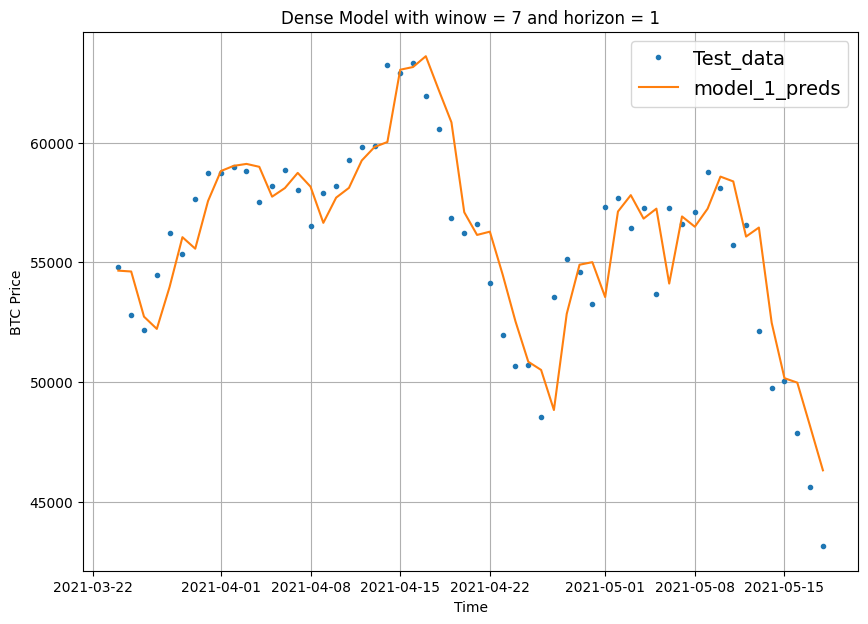

In [ ]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=500, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=500, format="-", label="model_1_preds")
plt.title('Dense Model with winow = 7 and horizon = 1')

#Model 2: Dense (window = 30, horizon = 1)


In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:1]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]])

In [ ]:
tf.random.set_seed=42

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 42ms/step - loss: 398.2960 - val_loss: 1843.8682
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 243.2724 - val_loss: 1057.3591
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 195.3692 - val_loss: 1087.3323
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 181.7216 - val_loss: 1004.0103
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 169.1325 - val_loss: 1045.4235
Epoch 6/100
18/18 [==============================] - 0s 22ms/step - loss: 168.1309 - val_loss: 932.3497
Epoch 7/100
18/18 [==============================] - 0s 22ms/step - loss: 160.1945 - val_loss: 845.7652
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 154.7610 - val_loss: 929.1585
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 164.7552 - val_loss: 851.6031
Epoch 10/100
18/18 [==============================] - 0s 22ms/s

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 610.4786


610.4785766601562

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 610.4785,
 'mse': 1291435.8,
 'rmse': 1136.4136,
 'mape': 2.753214,
 'mase': 0.031137535}

Text(0.5, 1.0, 'Dense Model " with windows = 30 and hrizon = 1')

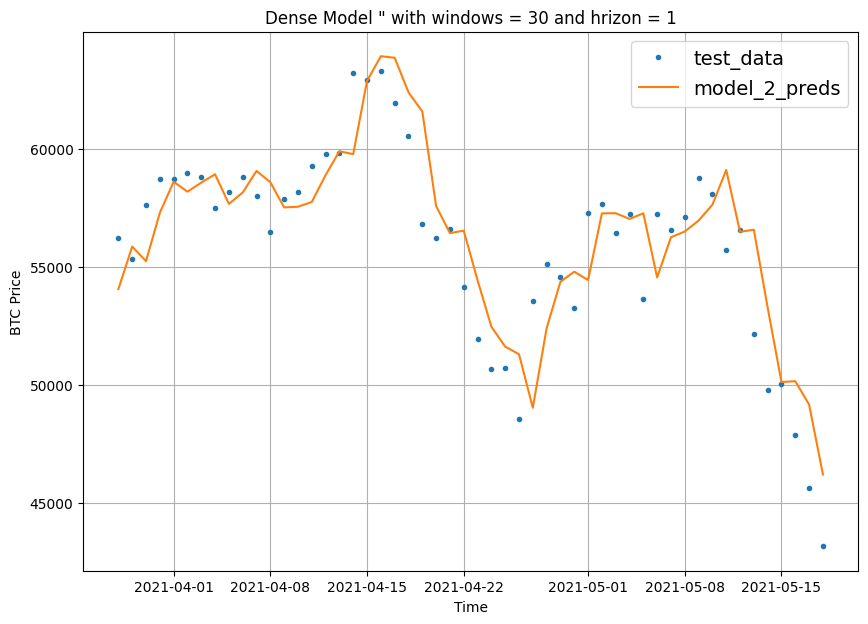

In [ ]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=500, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=500, format="-", label="model_2_preds")
plt.title('Dense Model " with windows = 30 and hrizon = 1')

In [ ]:
def plot_evaluation_metrics(models_results):
    """
    Plot bar chart for MAE, RMSE, MAPE, and MASE for multiple models.

    Parameters:
    - models_results: Dictionary containing model names as keys and evaluation metrics as values.
    """
    metrics = ['mae']

    # Set up the bar positions
    bar_positions = np.arange(len(metrics))

    # Bar width
    bar_width = 0.2

    # Plot each metric for each model
    for i, (model_name, result) in enumerate(models_results.items()):
        values = [result[metric] for metric in metrics]
        bar_positions_model = bar_positions + i * bar_width
        plt.bar(bar_positions_model, values, width=bar_width, label=model_name)

    # Set labels and title
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Comparison of Evaluation Metrics across Models')
    plt.xticks(bar_positions + bar_width * (len(models_results) - 1) / 2, metrics)
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
models_results = {'Model 1': model_1_results, 'Model 2': model_2_results, 'Naive Model': naive_results}

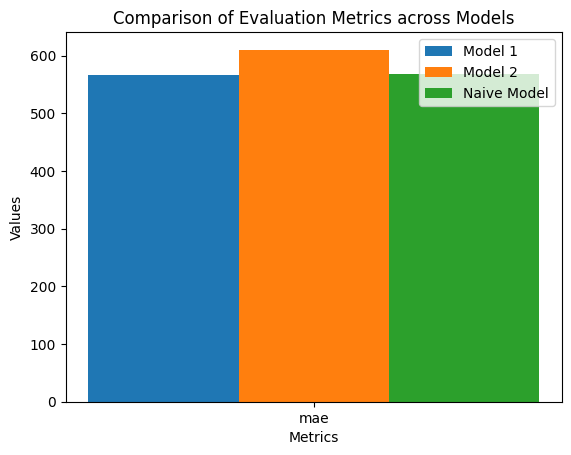

In [ ]:

plot_evaluation_metrics(models_results)

It looks like model_2 performs worse than the naïve model as well as model_1

# Model 3 Dense Model window = 30 and horizon = 7


In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
train_labels[:1]

array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]])

In [ ]:
tf.random.set_seed=42

# Create model (same model as model 1 but data input will be different)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1240.4924


1240.492431640625

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 621.6669  ,  394.23508 ,  352.2461  ,  559.5406  ,  548.85004 ,
         571.4803  ,  569.6797  ,  459.85107 ,  514.5645  ,  593.6204  ,
         769.10345 ,  755.00867 ,  800.7481  ,  829.4354  ,  548.4178  ,
         254.37068 ,  234.57883 ,  251.88867 ,  274.95898 ,  259.68332 ,
         138.08705 ,  134.28606 ,  266.5823  ,  295.6735  ,  160.95822 ,
         125.92676 ,   91.94804 ,  112.40472 ,  120.60638 ,  119.66553 ,
         202.5127  ,  310.90387 ,  267.27267 ,  236.8326  ,  289.82227 ,
         269.1628  ,  319.3273  ,  262.67062 ,  231.60205 ,  238.30705 ,
         455.00082 ,  111.91044 ,   63.847168,   74.750626,  127.28502 ,
         111.06403 ,   71.370186,  121.71826 ,   72.479355,   96.07087 ,
         141.76674 ,  138.47664 ,  166.5051  ,  192.63602 ,  297.2564  ,
         340.4025  ,  561.38464 ,  513.5433  ,  439.57352 ,  531.3432  ,
         364.67508 ,  195.30322 ,  270.44846 ,  327.69086 ,  393.5713  ,
         419.95807 ,  482.5185  ,  481.1377 

Text(0.5, 1.0, 'Dense Model " with windows = 30 and hrizon = 1')

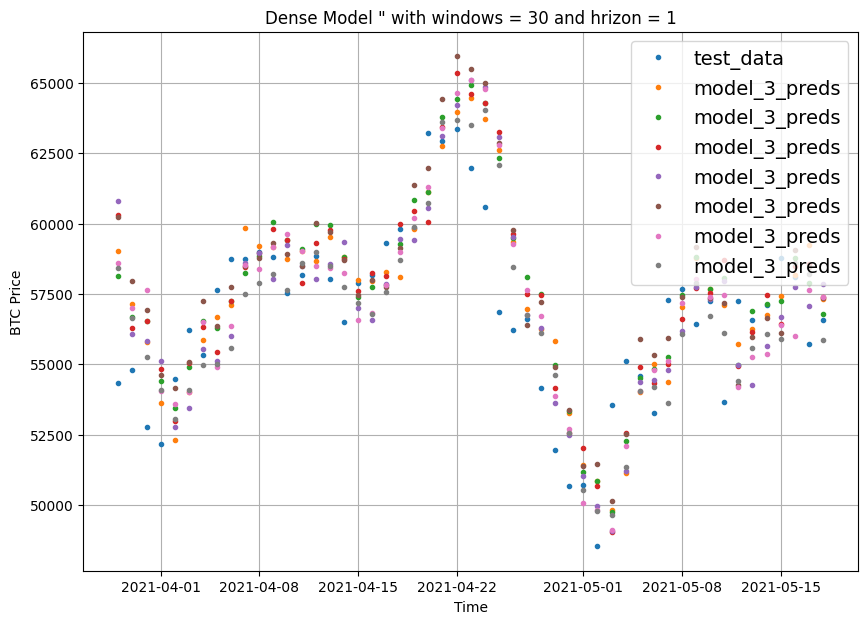

In [ ]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=500, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=500, label="model_3_preds")
plt.title('Dense Model " with windows = 30 and hrizon = 1')

In [ ]:
model_3_preds.shape,model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

#Adjusting our evalaution function so that it includes all the horiyon more than 1

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1240.4924,
 'mse': 5402640.0,
 'rmse': 1427.5336,
 'mape': 5.5710664,
 'mase': 0.063842565}

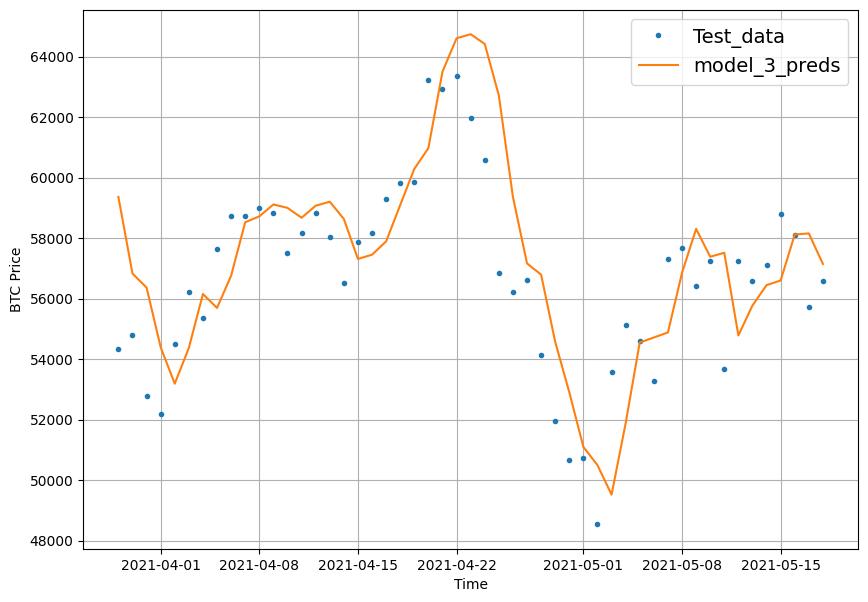

In [ ]:

plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=500,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=500,
                 label="model_3_preds")

In [ ]:
models_results = {'Naive Model': naive_results,'Model_1_horizon_1_window_7': model_1_results, 'Model_2_horizon_1_window_30': model_2_results,'Model_3_horizon_7_window_30': model_3_results }

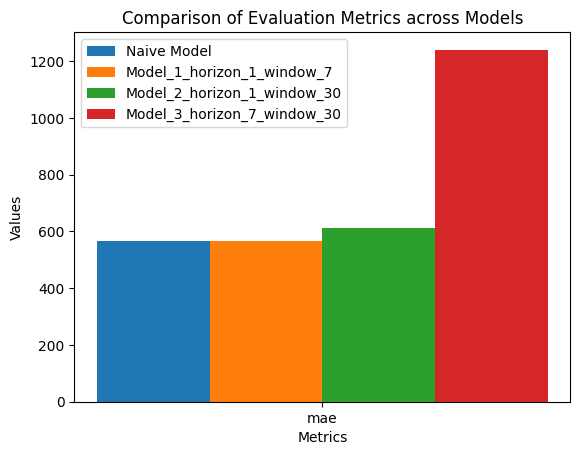

In [ ]:

plot_evaluation_metrics(models_results)

You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

# CONV 1D
seq to seq probelm
the horiyzon =1 and window = 7
that is week winow to predict the ext day


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
#create window data set
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

So to make conv 1d what shall we do , we dhould use temporal conv 1d
Input shape :  (batch_size,timesteps,input_dim)
timesteps = WINDOW_SIZE - the timesteps is also often referred to as features, our features are the previous WINDOW_SIZE values of Bitcoin
input_dim = HORIZON - our model views WINDOW_SIZE (one week) worth of data at a time to predict HORIZON (one day)


In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


the Lambda layer is used to apply a custom operation to the input data before passing it through the Conv1D layer in a TensorFlow/Keras model.

Specifically, the Lambda layer is being used to reshape the input data by adding an extra dimension to it. The operation lambda x: tf.expand_dims(x, axis=1) is a lambda function that takes the input tensor x and applies tf.expand_dims to add an extra dimension along axis 1. The purpose of this is to adjust the shape of the input data to meet the requirements of the Conv1D layer.

In the context of time series forecasting with Conv1D layers, the Conv1D layer typically expects input data with three dimensions: (batch_size, timesteps, features). The Lambda layer is used here to insert the necessary extra dimension for the Conv1D layer to operate correctly. The added dimension represents the "channels" in the Conv1D layer.

*padding = can be valid which means no padding, same which mean adding zeros evenly to left or right anso that it the same size or dimension ,causal is help full in temporal model where the model should not violate the temporal order*

In [ ]:
tf.random.set_seed=42
# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"), #filiters (hidden layer ) kernal size is the size of sliding windows ,padding = can be valid which means no padding, same which mean adding zeros evenly to left or right anso that it the same size or dimension causal is help full in te,poral modell where the model should not violate the temporal order
  layers.Dense(HORIZON)
], name="model_4_conv1D")

In [ ]:
# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 5ms/step - loss: 568.0900


568.0899658203125

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8875.159, 8782.158, 8996.51 , 8777.549, 8745.433, 8730.417,
       8674.745, 8527.198, 8456.11 , 8513.083], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 568.09,
 'mse': 1172203.4,
 'rmse': 1082.6833,
 'mape': 2.540794,
 'mase': 0.029092353}

In [ ]:
models_results = {'Naive Model': naive_results,'Model_1_horizon_1_window_7': model_1_results, 'Model_2_horizon_1_window_30': model_2_results,'Model_3_horizon_7_window_30': model_3_results, 'Model_4_CONV1d': model_4_results }

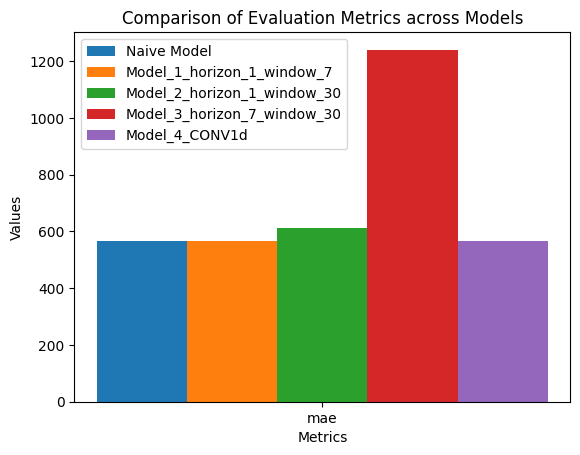

In [ ]:

plot_evaluation_metrics(models_results)

#Model5 LSTM RNN
Once again, one of the most important steps for the LSTM model will be getting our data into the right shape.

The tf.keras.layers.LSTM() layer takes a tensor with [batch, timesteps, feature] dimensions.

As mentioned earlier, the batch dimension gets taken care of for us but our data is currently only has the feature dimension (WINDOW_SIZE).

To fix this, just like we did with the Conv1D model, we can use a tf.keras.layers.Lambda() layer to adjust the shape of our input tensors to the LSTM layer.

In [ ]:
tf.random.set_seed=42


# Create model using Sequential API
model_5 = tf.keras.Sequential([
    # Expand input dimension to be compatible with LSTM
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1), input_shape=(WINDOW_SIZE,)),

    # LSTM layer
    layers.LSTM(128, activation="relu"),

    # Dense layer for final output
    layers.Dense(HORIZON)
], name="model_5_lstm")


In [ ]:
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 584.2493


584.249267578125

In [ ]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8930.571, 8796.831, 8958.557, 8784.591, 8751.273, 8727.873,
       8695.068, 8529.207, 8471.984, 8503.655], dtype=float32)>

In [ ]:
# Evaluate predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 584.2493,
 'mse': 1220747.8,
 'rmse': 1104.8745,
 'mape': 2.6333456,
 'mase': 0.029919885}

In [ ]:
models_results = {'Naive Model': naive_results,'Model_1_horizon_1_window_7': model_1_results, 'Model_2_horizon_1_window_30': model_2_results,'Model_3_horizon_7_window_30': model_3_results, 'Model_4_CONV1d': model_4_results, 'Model_5_LSTM': model_5_results }

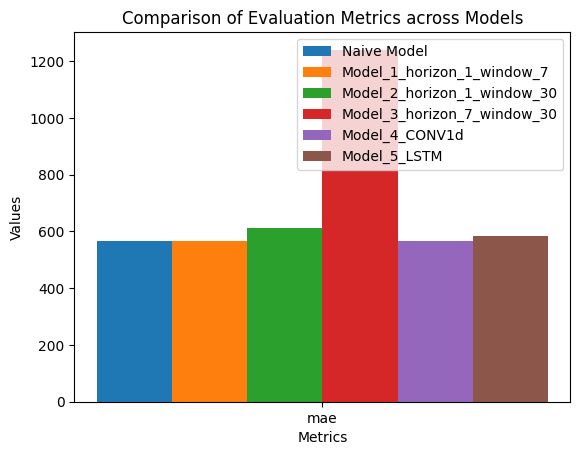

In [ ]:
plot_evaluation_metrics(models_results)

# Creating Multivariate time series data :
feature which influence the traget varaible here influncing the price of bit coin.
So for price for bitcoin it has an influnce with the halving . now what is this halving?
Bitcoin halving is an event programmed into the Bitcoin protocol that occurs approximately every four years or after every 210,000 blocks are mined. During a halving event, the reward that miners receive for successfully mining a new block is reduced by half. This process is hard-coded into the Bitcoin software and is intended to limit the total supply of bitcoins, creating a controlled and diminishing issuance over time.

Here's a breakdown of what happens during a Bitcoin halving:

Original Block Reward: When Bitcoin was launched in 2009, miners were initially rewarded with 50 bitcoins for every block they successfully mined.

First Halving (2012): After the completion of 210,000 blocks, the first halving occurred in November 2012. The block reward was reduced from 50 to 25 bitcoins.

Second Halving (2016): The second halving occurred in July 2016, and the block reward was further reduced from 25 to 12.5 bitcoins.

Third Halving (2020): The most recent halving event took place in May 2020. The block reward was halved from 12.5 to 6.25 bitcoins.

Future Halvings: The next halving is expected to occur after the completion of another 210

In [ ]:
# lets add the bitcoin halving to our data
bitdata

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitdata.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitdata.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitdata.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


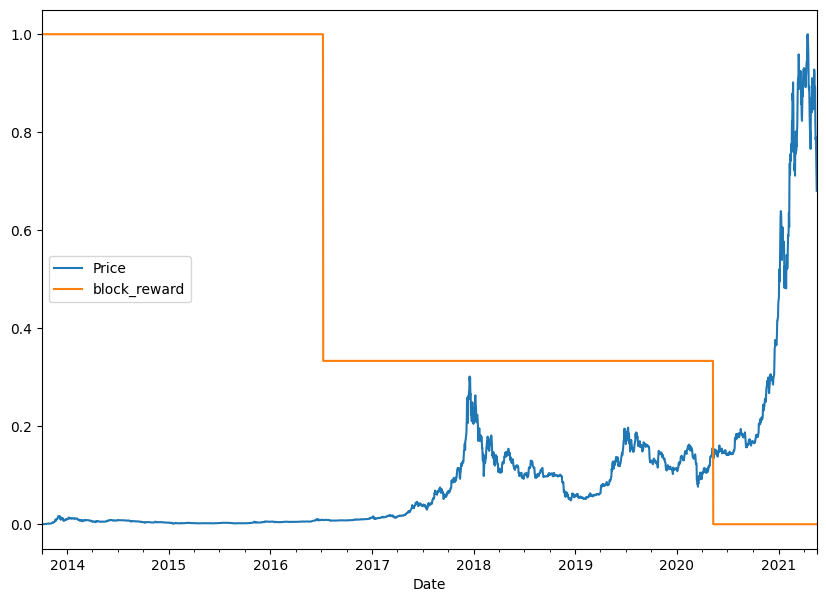

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

now we have a multivarate data so we have to add this to the data that the price is now a week consiering

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

#Model 6 ,Dnese Model for multivarate series.


In [ ]:
tf.random.set_seed = 42

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.3305


565.3305053710938

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8822.316, 8773.645, 9039.282, 8748.736, 8742.639, 8726.538,
       8669.85 , 8509.756, 8447.502, 8525.522], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.3305,
 'mse': 1150885.8,
 'rmse': 1072.7935,
 'mape': 2.542998,
 'mase': 0.028951036}

In [ ]:
models_results = {'Naive Model': naive_results,'Model_1_horizon_1_window_7': model_1_results, 'Model_2_horizon_1_window_30': model_2_results,'Model_3_horizon_7_window_30': model_3_results, 'Model_4_CONV1d': model_4_results, 'Model_5_LSTM': model_5_results, "model_6_dense_multivariate": model_6_results }

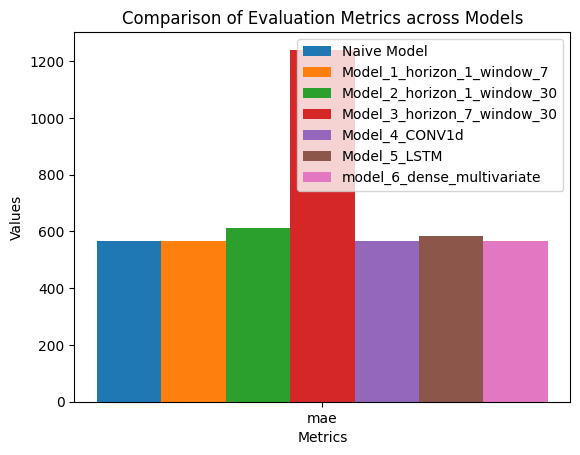

In [ ]:
plot_evaluation_metrics(models_results)

#Model 7 N-Beats (https://arxiv.org/abs/1905.10437)



To create new layers asthere is no specific layers and we have to create it , so we need
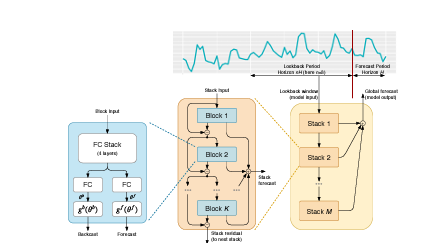

Setting up the NBeatsBlock custom layer we see:

The class inherits from tf.keras.layers.Layer (this gives it all of the methods assosciated with tf.keras.layers.Layer)<br/>
The constructor (def __init__(...)) takes all of the layer hyperparameters as well as the **kwargs argument
The **kwargs argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, input_shape, trainable and name
In the constructor, the block architecture layers are created:<br/>
The hidden layers are created as a stack of fully connected with n_nuerons hidden units layers with ReLU activation<br/>
The theta layer uses theta_size hidden units as well as linear activation
The call() method is what is run when the layer is called:<br/>
It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)
After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: input_size) and forecast (forward predictions, shape: horizon) are returned

In [ ]:
#building and testing n beat model
class NBeatsBlock(tf.keras.layers.Layer):#https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing
      def __init__(self,
                   input_size : int,
                   theta_size: int,
                   horizon: int,
                   n_neurons: int,
                   n_layers:int,
                   **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size # block input from the fig
        self.theta_size = theta_size # theta in FC block n fig
        self.horizon = horizon # to what we want to predict
        self.n_neurons = n_neurons # in Fc in each layer how man beurons
        self.n_layers = n_layers # in FC the fully connected layer how many
        # we are bilding the block which contains 4 layers which is fully connected öayers easch has relu activation
        self.hidden = [tf.keras.layers.Dense(n_neurons,activation = "relu")for _ in range(n_layers)]
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation = 'linear',name ="theta")

      def call(self,inputs):
        x = inputs
        for layer in self.hidden:
          x = layer(x)
        theta  = self.theta_layer(x)
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
#creat dummy inputs ,the inputs should be same size as input_size
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.17256477 -0.41904923 -0.16960755  0.14047907  0.33179748 -0.37013942
 -0.08194501]
Forecast: -0.010815680027008057


above we just create the first block of n beats
Preparing data for the N-BEATS algorithm using tf.data
We've got the basic building block for the N-BEATS architecture ready to go.

But before we use it to replicate the entire N-BEATS generic architecture, let's create some data.

This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the tf.data API.

And because the N-BEATS algorithm is focused on univariate time series, we'll start by making training and test windowed datasets of Bitcoin prices (just as we've done above).

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitdata.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

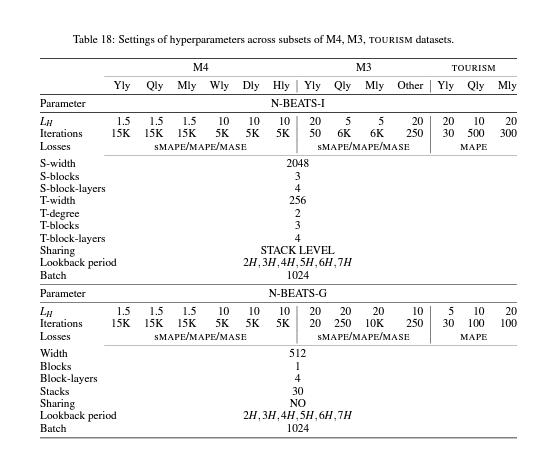

Table 18 from N-BEATS paper describing the hyperparameters used for the different variants of N-BEATS. We're using N-BEATS-G which stands for the generic version of N-BEATS

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

#Setting up hyperparameters for N-BEATS algorithm

from the figure above we look at the daily and N beats which is generic

In [ ]:
#Setting up hyperparameters for N-BEATS algorithm

# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

tf.keras.layers.subtract(inputs) - subtracts list of input tensors from each other
tf.keras.layers.add(inputs) - adds list of input tensors to each othe

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")


Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


#Building, compiling and fitting the N-BEATS algorithm
Okay, we've finally got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm.

We'll do so by going through the following:

Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
Make the initial backcast and forecasts for the model with the layer created in (1)
Use a for loop to create stacks of block layers
Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
Create the double residual stacking using subtract and add layers
Put the model inputs and outputs together using tf.keras.Model()
Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
tf.keras.callbacks.EarlyStopping() - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
tf.keras.callbacks.ReduceLROnPlateau() - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)
Woah. A bunch of steps. But I'm sure you're up to it.

In [ ]:
tf.random.set_seed = 42
# steup the NbeatsBlock Layers:
nbeats_block_layer = NBeatsBlock(input_size= INPUT_SIZE,
                                theta_size = THETA_SIZE,
                                 horizon =HORIZON,
                                 n_neurons= N_NEURONS,
                                 n_layers= N_LAYERS,
                                 name = 'Intialblock')

# Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE),name= 'stack_input')
# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
residuals,forecast = nbeats_block_layer(stack_input)

#create stack of block layers

for i, _ in enumerate(range(N_STACKS -1)): #as already one block has been created
     #now from the model the bbackcast have to be subtracted and the forecast have to be added
     backcast, block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                           theta_size = THETA_SIZE,
                                           horizon = HORIZON,
                                           n_neurons= N_NEURONS,
                                           n_layers = N_LAYERS,
                                            name=f"NBeatsBlock_{i}")(residuals)
#create the double resiual stacjing
     residuals = layers.subtract([residuals,backcast], name =f"subtract_{i}" )
     forecast = layers.add([forecast, block_forecast], name=f"add_{i}")



# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")
#Compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])
#fit the model

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 709: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1076: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1176: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 567.8870 - mae: 567.8870 - mse: 1154713.2500


[567.8870239257812, 567.8870239257812, 1154713.25]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.934, 8783.396, 9029.1  , 8752.821, 8758.67 , 8743.651,
       8654.229, 8513.433, 8468.223, 8515.277], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 567.887,
 'mse': 1154713.2,
 'rmse': 1074.5758,
 'mape': 2.5832436,
 'mase': 0.029081957}

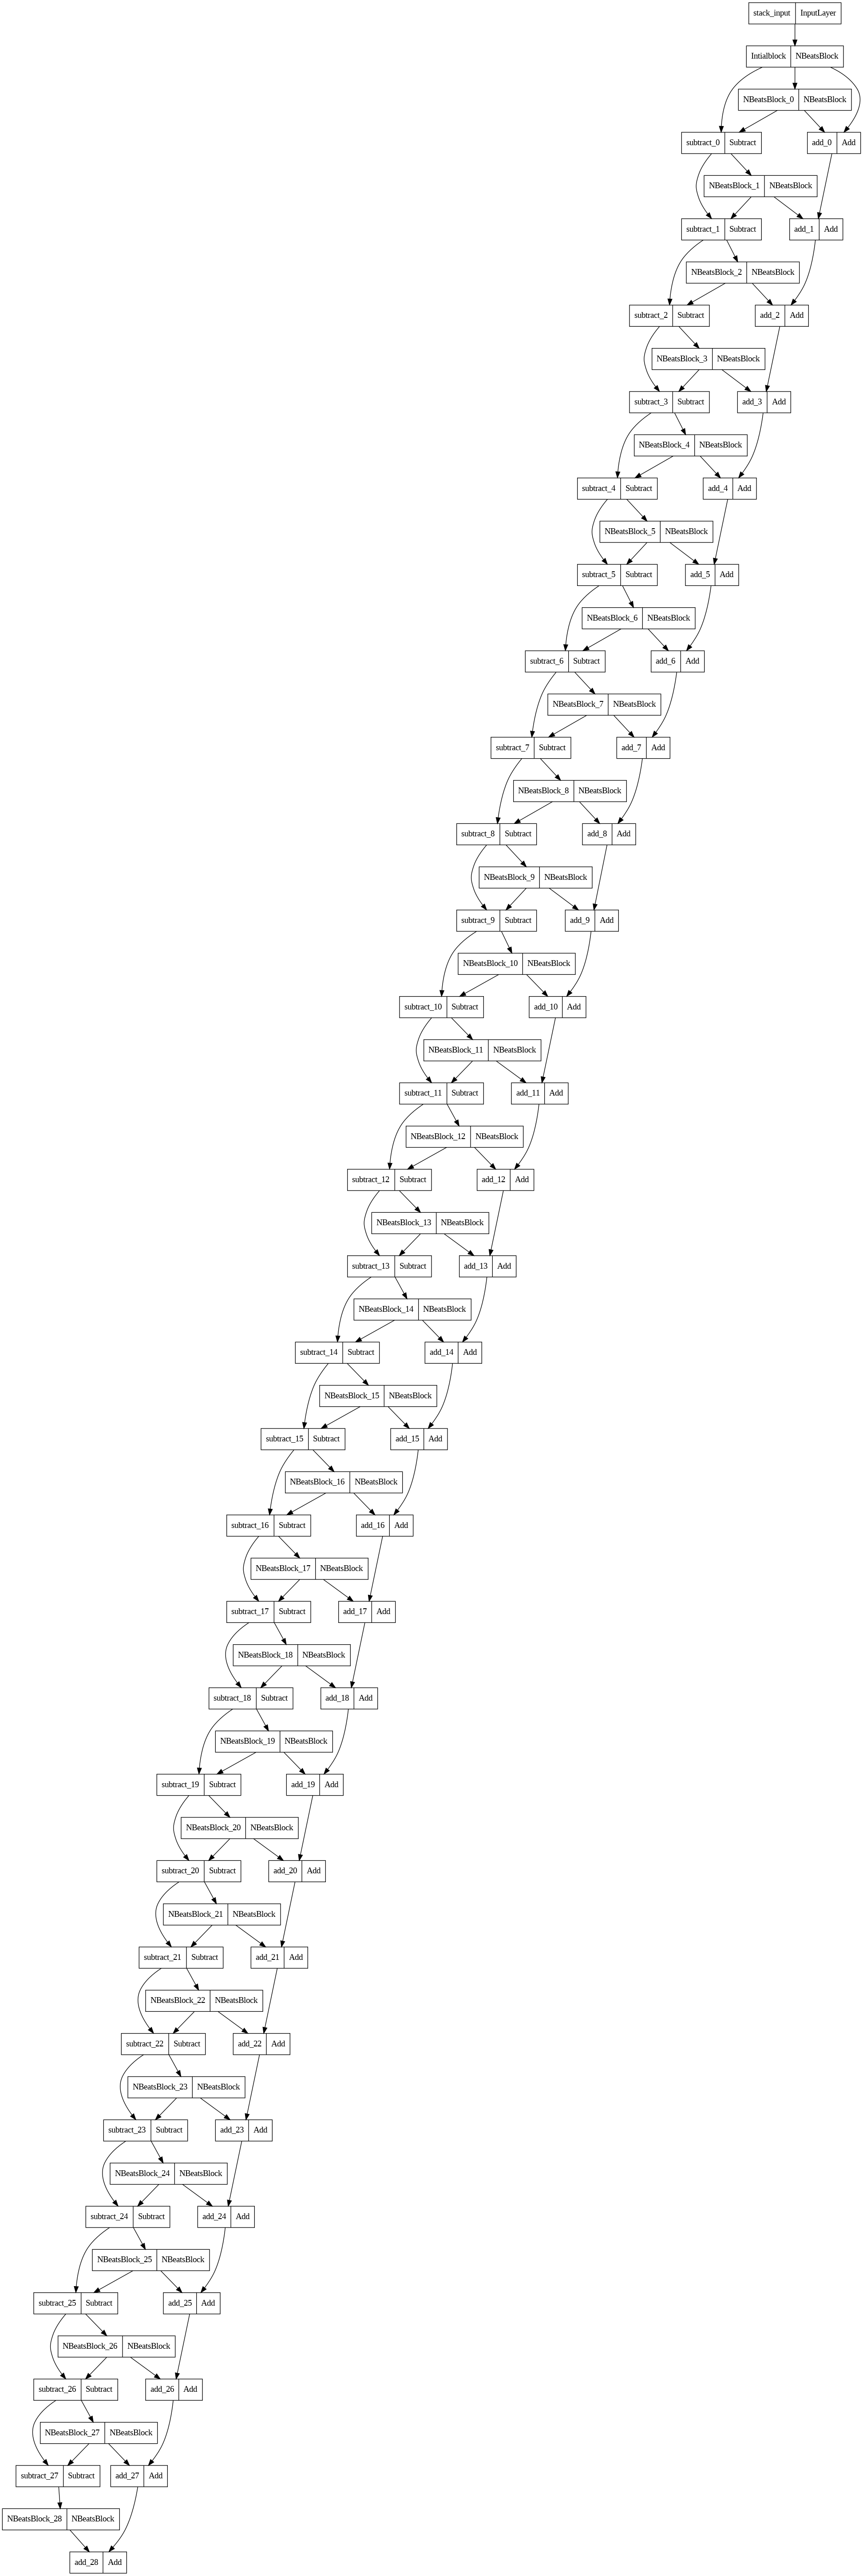

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

#Model 8: Creating Ensemble model
we know about random and XG boost algorthims,
But actually what are they are?
so what is actaully ensemble models:
its like a team work ,Let's imagine you're making an important decision, like predicting the outcome of a sports game or guessing the number of candies in a jar. Now, instead of relying on just one person's opinion, you gather predictions from multiple friends, each with their own way of making guesses.

An ensemble model in machine learning is somewhat similar. Instead of relying on a single "opinion" or prediction from one model, it combines predictions from several models. Each model in the ensemble might be good at catching different patterns or making predictions in certain situations.

One friend looks at the clouds, another checks a weather app, and the third one listens to the behavior of birds. Individually, they might not always be right, but by combining their opinions, you get a more reliable prediction.

In the same way, an ensemble model combines the strengths of different models to make better predictions. It's like forming a "committee" of models, and they work together to give you a more accurate answer than any one of them could provide alone. This helps improve the overall performance and reliability of the prediction.

There is always a tradeoff one is the time and other one would be the performance as we will be training more models ´, then what will about the  time?









In TensorFlow, kernel_initializer is a parameter used in layers that involve weight matrices, such as dense layers or convolutional layers. The kernel_initializer determines the strategy for initializing the weights of the layer.

The specific value "he_normal" refers to the He normal initializer, which is a popular initialization technique for neural networks. The He normal initializer is designed to work well with activation functions that have a rectified linear unit (ReLU) shape. ReLU is a common activation function used in neural networks.

Here's a brief explanation of the He normal initializer and why it's used:

He Normal Initialization:

The He normal initializer initializes the weights by drawing random values from a normal distribution with a mean of 0 and a standard deviation of
2
fan_in
fan_in
2
​

​
 , where
fan_in
fan_in is the number of input units in the weight tensor.
It is named after the researcher Kaiming He, who proposed this initialization method. The idea is to adapt the initialization to the characteristics of ReLU activation, which tends to "kill" gradients during training if weights are initialized too small.
Usage:

When you set kernel_initializer="he_normal" in a layer, you're instructing TensorFlow to initialize the weights of that layer using the He normal initializer.
Example in a dense layer:

In [ ]:
## built an ensemble models.
def get_ensemble_models(horizon = HORIZON, train_data = train_dataset, test_data = test_dataset, num_iter = 10,num_epochs = 1000, loss_funs =['mae','mse','mape']) :
  """REturn a list of num_iter modles each trained on MAE and MSE and MAPE loss
  For example , if num_iter =10 , a list of30 trained  models will be retuned:"""

  ensemble_models = [ ] # for returning eenmbel models
  for i in range(num_iter):
    for loss_function in loss_funs:
      print(f"Optimizing modles by reducing : {loss_function} for { num_epochs} epochs, model number :{i} ")

      model = tf.keras.Sequential([
          layers.Dense(128,kernel_initializer = "he_normal" ,activation = "relu" ),
          layers.Dense(128,kernel_initializer = "he_normal" ,activation = "relu"),
          layers.Dense(HORIZON)
          ])
      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)


Optimizing modles by reducing : mae for 1000 epochs, model number :0 

Epoch 613: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 734: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 834: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing modles by reducing : mse for 1000 epochs, model number :0 

Epoch 609: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 709: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing modles by reducing : mape for 1000 epochs, model number :0 

Epoch 239: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing modles by reducing : mae for 1000 epochs, model number :1 

Epoch 611: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 874: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 974: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

So 15 models 5 with mae 5 with mse and 5 with mape

In [ ]:
len(ensemble_models)

15

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 39ms/step
CPU times: user 222 ms, sys: 15.9 ms, total: 238 ms
Wall time: 591 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8757.667,  8841.649,  9068.545, ..., 50533.42 , 48131.27 ,
        46501.535],
       [ 8737.776,  8745.5  ,  9062.381, ..., 49718.914, 48081.152,
        46590.477],
       [ 8798.862,  8781.941,  9064.043, ..., 49975.574, 48149.566,
        45837.074],
       ...,
       [ 8801.633,  8842.222,  9036.921, ..., 49660.82 , 48436.67 ,
        46051.86 ],
       [ 8734.439,  8770.525,  9087.281, ..., 49783.73 , 48473.082,
        45408.22 ],
       [ 8822.008,  8789.146,  9048.78 , ..., 49968.836, 48059.297,
        45623.844]], dtype=float32)>

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds) # take the median across all ensemble predictions
ensemble_results

{'mae': 583.29706,
 'mse': 1189266.9,
 'rmse': 1090.4476,
 'mape': 2.6572983,
 'mase': 0.029871121}

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.mean(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 572.6955,
 'mse': 1154367.2,
 'rmse': 1074.4148,
 'mape': 2.5941389,
 'mase': 0.029328203}

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 571.2699,
 'mse': 1154421.2,
 'rmse': 1074.44,
 'mape': 2.5855231,
 'mase': 0.029255198}

#Plotting the prediction intervals (uncertainty estimates) of our ensemble

so far we were making point prediction which just predicts one value but we can have more accurate if we predict a range of predictions

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
Measure the standard deviation of the predictions
Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 # we are assuming that itas a gussian /normal distribution


  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval # adding and subtracting the interval to mean of predictions
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

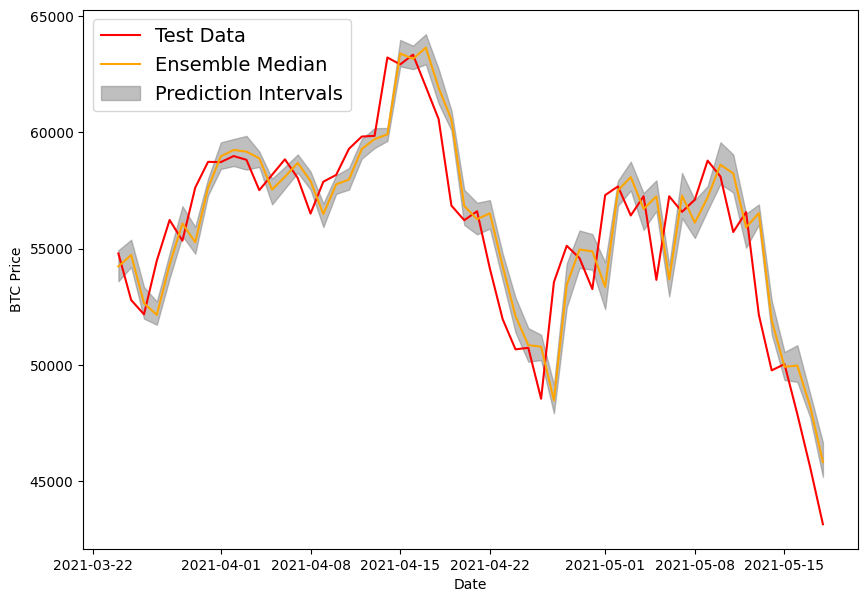

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], label="Test Data",color = 'red')
plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", label="Ensemble Median",color = 'orange')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals",color = 'gray',alpha = 0.5 )
plt.legend(loc="upper left", fontsize=14);

What can you tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be overfitting the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

Uncertanity about data
There are two type of uncertanities is cocnut and subway uncertanities
Uncertanities seek out to be qualitatively and quntitatively

1. what can my model know ( That is giving perfect data , that it can learm much from the data)
2.what my model does not know ( that is models does not what they are predicting is right or not)

these are two major types of uncertainity:
1. **Aleatoric uncertainity**- this type of uncertainty cannot be reduced and it is often referred as data uncertainty or subway uncertainty
2. **Epistemic uncertanit** - this type of uncetainty can be reduced ,it also referred to as model uncertainity or 'coconut'


lets discuss about these two :
so the firts Aleatroic uncertainty: imagine you are at the subway and waiting for the train but if the train is said to come at 10:07 but we know that it might  a minute or two late perhaps early , we are not sure what time it be so this is like the uncertainty that can't be reduced .

where as the Epistemic uncertainity : which is like if you are on the beach a coconut falling on you head ,this can be reduced if you are standing away and maybe you are in beach with no coconut tree, this helps in reducing the uncertainities.

So Aleatroic uncertainty is similar to bitcoin price which has no dwtw where the uncertanites can be reduced?


#Model 9: Train a model on the full historical data to make predictions into future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()


In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed = 42

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
INTO_FUTURE = 50

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55348.0546875

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55348.0546875 ] -> Prediction: 53743.68359375

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55348.0546875  53743.68359375] -> Prediction: 48749.046875

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55348.0546875  53743.68359375 48749.046875  ] -> Prediction: 47893.32421875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55348.0546875
 53743.68359375 48749.046875   47893.32421

In [ ]:
future_forecast[:10]

[55348.055,
 53743.684,
 48749.047,
 47893.324,
 46832.08,
 46479.09,
 49033.01,
 55334.97,
 52499.754,
 47205.31]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitdata.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
       '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
       '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15',
       '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19',
       '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01',
       '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05',
       '2021-07-06', '2021-07-07'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02',
        '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06',
        '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
        '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
        '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
        '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22',
        '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26',
        '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30',
        '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
        '2021-07-05', '2021-07-06', '2021-07-07'], dtype='datetime64[D]'),
 array([43144.473, 55348.055, 53743.684, 48749.047, 47893.324, 46832.08 ,
        46479.09 , 49033.01 , 55334.97 , 52499.754, 47205.31 , 46631.465,
        4

In [ ]:
len(future_forecast)

5592

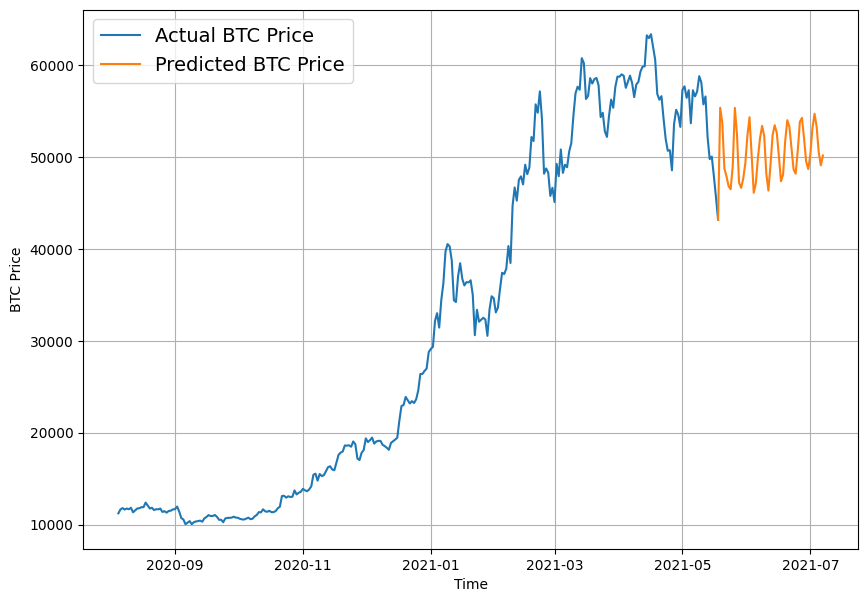

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitdata.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

It looks like our predictions are starting to form a bit of a cyclic pattern (up and down in the same way).

Perhaps that's due to our model overfitting the training data and not generalizing well for future data. Also, as you could imagine, the further you predict into the future, the higher your chance for error (try seeing what happens when you predict 100 days into the future).

But of course, we can't measure these predictions as they are because after all, they're predictions into the actual-future (by the time you read this, the future might have already happened, if so, how did the model go?).

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitdata.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

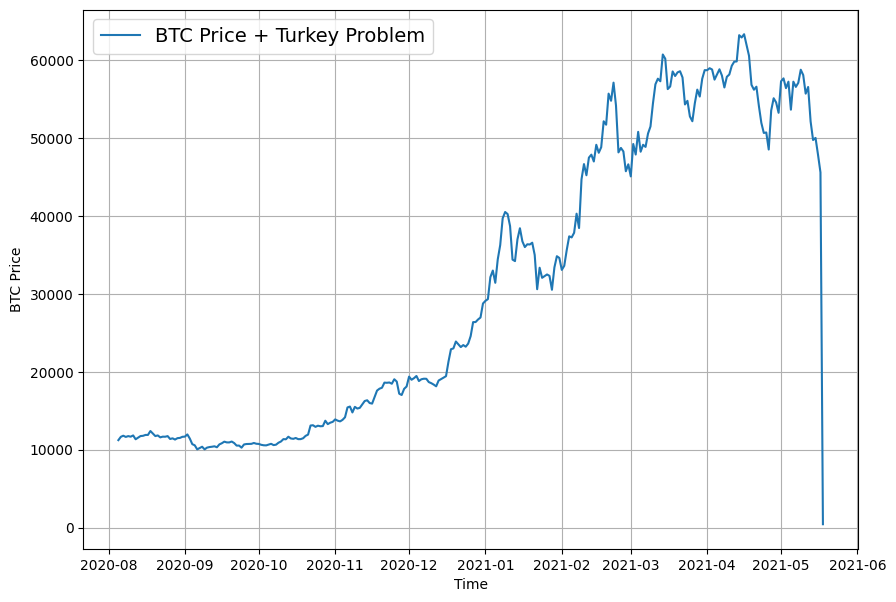

In [ ]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 795.0544


795.0543823242188

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 643.3477


643.3477172851562

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8866.596, 8782.631, 9057.374, 8796.33 , 8736.409, 8766.597,
       8691.309, 8524.862, 8476.202, 8540.151], dtype=float32)>

In [ ]:

# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17136.607,
 'mse': 614927600.0,
 'rmse': 23727.97,
 'mape': 121.46584,
 'mase': 0.88451046}

In [ ]:
model_1_results

{'mae': 566.19977,
 'mse': 1156183.6,
 'rmse': 1075.2598,
 'mape': 2.5367117,
 'mase': 0.028995551}

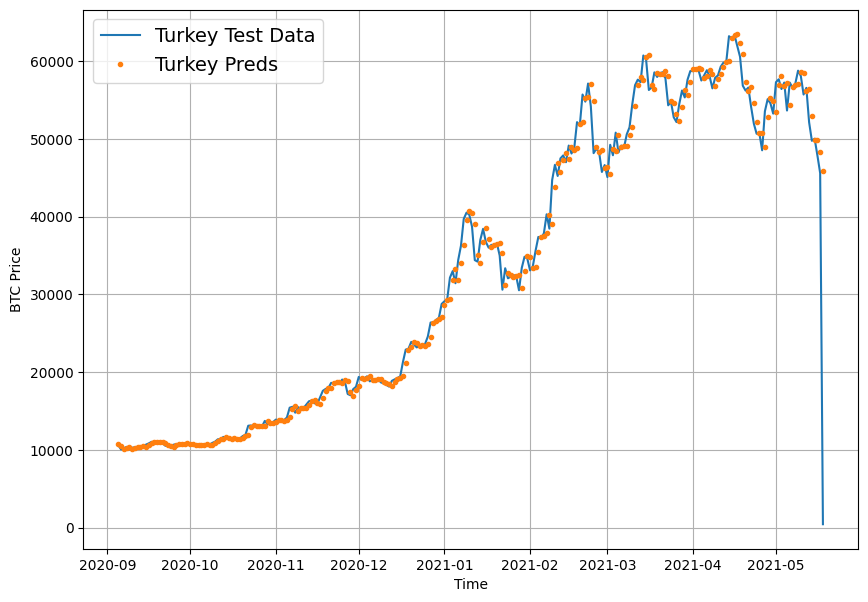

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results})